In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
treino = pd.read_csv('C:/Users/vitin/Downloads/train.csv')
teste = pd.read_csv('C:/Users/vitin/Downloads/test.csv')

In [5]:
dtypes = ['int64']
df_teste = teste.select_dtypes(include=dtypes)
df_teste.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [7]:
df_treino = treino.select_dtypes(include=dtypes)
df_treino = df_treino[['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']]
df_treino.head()

In [9]:
X = df_treino.drop('Id', axis=1)

In [10]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,856,854,0,1710,...,0,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,1262,0,0,1262,...,1,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,920,866,0,1786,...,1,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,961,756,0,1717,...,1,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,1145,1053,0,2198,...,1,192,84,0,0,0,0,0,12,2008


In [12]:
y = treino.select_dtypes(include=dtypes)
y = y['SalePrice']

In [13]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.30)

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rfr = RandomForestRegressor(n_estimators = 100)

In [18]:
rfr.fit(X_treino, y_treino)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [20]:
pred_treino = rfr.predict(X_teste)

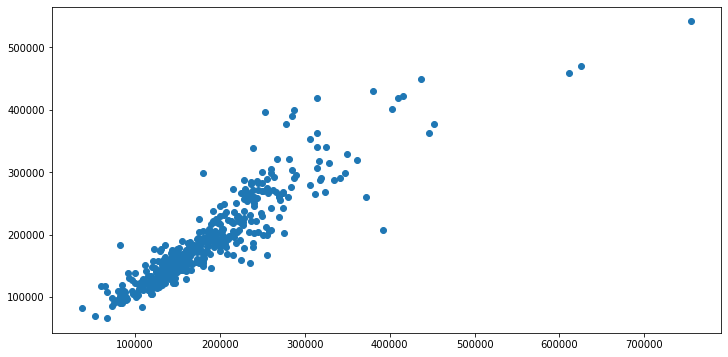

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(y_teste, pred_treino)

In [25]:
from sklearn.metrics import mean_squared_log_error

In [26]:
np.sqrt(mean_squared_log_error(y_teste, pred_treino))

0.15651562790119886

# APLICANDO O MODELO NA BASE DE TESTE



In [32]:
X_prev = df_teste.drop('Id', axis=1)

In [33]:
modelo = rfr.fit(X, y)

In [34]:
p = modelo.predict(X_prev)

In [36]:
p

array([128210.5 , 153649.5 , 168926.4 , ..., 151480.5 , 125348.2 ,
       230886.26])

In [37]:
sub = pd.Series(p, index=teste['Id'], name='SalePrice')

In [38]:
sub

Id
1461    128210.50
1462    153649.50
1463    168926.40
1464    180209.00
1465    195443.12
          ...    
2915     84557.00
2916     82284.00
2917    151480.50
2918    125348.20
2919    230886.26
Name: SalePrice, Length: 1459, dtype: float64

In [39]:
sub.to_csv('modelo2.csv', header=True)